In [56]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import gridspec
import cartopy.crs as ccrs
from scipy import stats
import matplotlib as mpl
import pickle
import datetime
import glob
import cartopy
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")

In [57]:
season = '2019-2020'
date = season.split('-')

datapath = '/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_interpolated/'
sats = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM','IS2','AK_CPOM']
folders = ['CS2_CPOM','Bristol_LARM/CS2/freeboard','CS2_S3_GPOD/MERGE','GPOD_Bristol/MERGE','IS2',
          'AK_CPOM']

data = {}
missing = np.full((160,160),np.nan)

for sat, folder in zip(sats,folders):
    months = ['Oct','Nov','Dec']
    days = ['1031','1130','1231']
    for month,day in zip(months,days):
        try:
            data[sat + '_' + month] = np.load(datapath + folder + '/FB_interp_'+ season +'_50km_' + date[0] + day + '.npy')
        except: 
            data[sat + '_' + month] = missing
    months = ['Jan','Feb','Mar']
    days = ['0131','0228','0331']
    for month,day in zip(months,days):
        try:
            data[sat + '_' + month] = np.load(datapath + folder + '/FB_interp_' + season + '_50km_' + date[1] + day + '.npy')
        except: 
            data[sat + '_' + month] = missing   

# snow depth

In [58]:
%%capture output
x = plt.imshow(np.full((3,3),np.nan),vmin=0,vmax=0.4,cmap='YlGnBu_r')

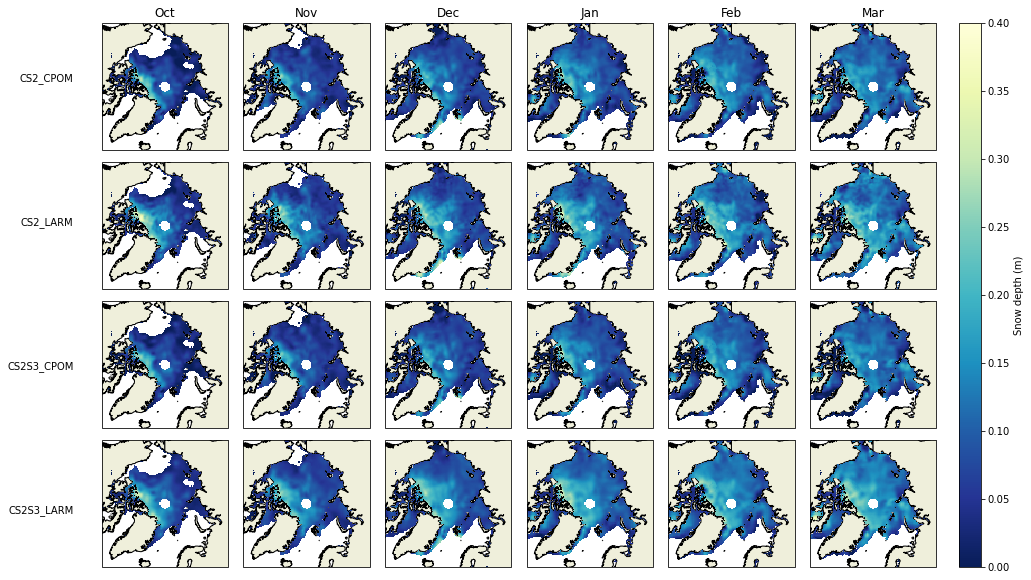

In [59]:
sats = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM']
months = ['Oct','Nov','Dec','Jan','Feb','Mar']

Ku = {}
Ka = {}
for sat in sats:
    for month in months:
        Ku[sat + '_' + month] = data[sat + '_' + month]
        Ka[sat + '_' + month] = data['IS2_' + month]

obs_Ku = []
for key in Ku:
    obs_Ku.append(key)
obs_Ka = []
for key in Ka:
    obs_Ka.append(key)
    
lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=6, nrows=4,hspace=0.1,wspace=0.1)

for counter in range(0,24):

    alpha_1=1.0
    alpha_2=0.0

    fb1 = Ku[obs_Ku[counter]]
    fb2 = Ka[obs_Ka[counter]]   

    rho_w=1000.
    rho_i=950.
    rho_s=330.
    c=3.
    c_s=2.

    A11=(rho_w-rho_i)/rho_w
    A12=(1-alpha_1*c/c_s-rho_s/rho_w)
    A21=(rho_w-rho_i)/rho_w
    A22=(1-alpha_2*c/c_s-rho_s/rho_w)

    h=np.zeros((160,160,2))
    A = np.array([[A11,A12],[A21,A22]]) 
    Ainv = np.linalg.inv(A)
    for i in range(160):
        for j in range(160):
            h[i,j] = np.dot(Ainv,np.array([fb1[i,j],fb2[i,j]]))

    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,h[:,:,1],cmap='YlGnBu_r',vmin=0,vmax=0.4,alpha=1.0, transform=ccrs.PlateCarree())
    
    if counter < 6:
        ax.set_title(months[counter])
        
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Snow depth (m)")

fig.text(0.1, 0.8, 'CS2_CPOM', ha='right')
fig.text(0.1, 0.6, 'CS2_LARM', ha='right')
fig.text(0.1, 0.4, 'CS2S3_CPOM', ha='right')
fig.text(0.1, 0.2, 'CS2S3_LARM', ha='right')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Upgrade Report/figures/snow_IS2.png',bbox_inches = "tight")

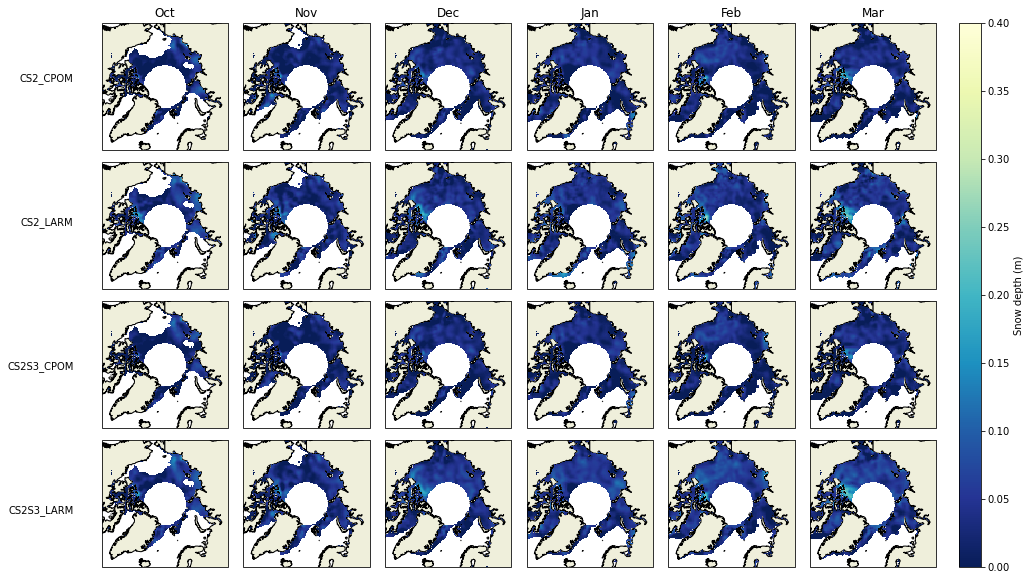

In [60]:
sats = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM']
months = ['Oct','Nov','Dec','Jan','Feb','Mar']

Ku = {}
Ka = {}
for sat in sats:
    for month in months:
        Ku[sat + '_' + month] = data[sat + '_' + month]
        Ka[sat + '_' + month] = data['AK_CPOM_' + month]

obs_Ku = []
for key in Ku:
    obs_Ku.append(key)
obs_Ka = []
for key in Ka:
    obs_Ka.append(key)
    
lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=6, nrows=4,hspace=0.1,wspace=0.1)

for counter in range(0,24):

    alpha_1=1.0
    alpha_2=0.0

    fb1 = Ku[obs_Ku[counter]]
    fb2 = Ka[obs_Ka[counter]]   

    rho_w=1000.
    rho_i=950.
    rho_s=330.
    c=3.
    c_s=2.

    A11=(rho_w-rho_i)/rho_w
    A12=(1-alpha_1*c/c_s-rho_s/rho_w)
    A21=(rho_w-rho_i)/rho_w
    A22=(1-alpha_2*c/c_s-rho_s/rho_w)

    h=np.zeros((160,160,2))
    A = np.array([[A11,A12],[A21,A22]]) 
    Ainv = np.linalg.inv(A)
    for i in range(160):
        for j in range(160):
            h[i,j] = np.dot(Ainv,np.array([fb1[i,j],fb2[i,j]]))

    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,h[:,:,1],cmap='YlGnBu_r',vmin=0,vmax=0.4,alpha=1.0, transform=ccrs.PlateCarree())
    
    if counter < 6:
        ax.set_title(months[counter])
        
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Snow depth (m)")

fig.text(0.1, 0.8, 'CS2_CPOM', ha='right')
fig.text(0.1, 0.6, 'CS2_LARM', ha='right')
fig.text(0.1, 0.4, 'CS2S3_CPOM', ha='right')
fig.text(0.1, 0.2, 'CS2S3_LARM', ha='right')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Upgrade Report/figures/snow_AK.png',bbox_inches = "tight")

# sea ice thickness

In [61]:
%%capture output
x = plt.imshow(np.full((3,3),np.nan),vmin=0,vmax=5,cmap='YlGnBu_r')

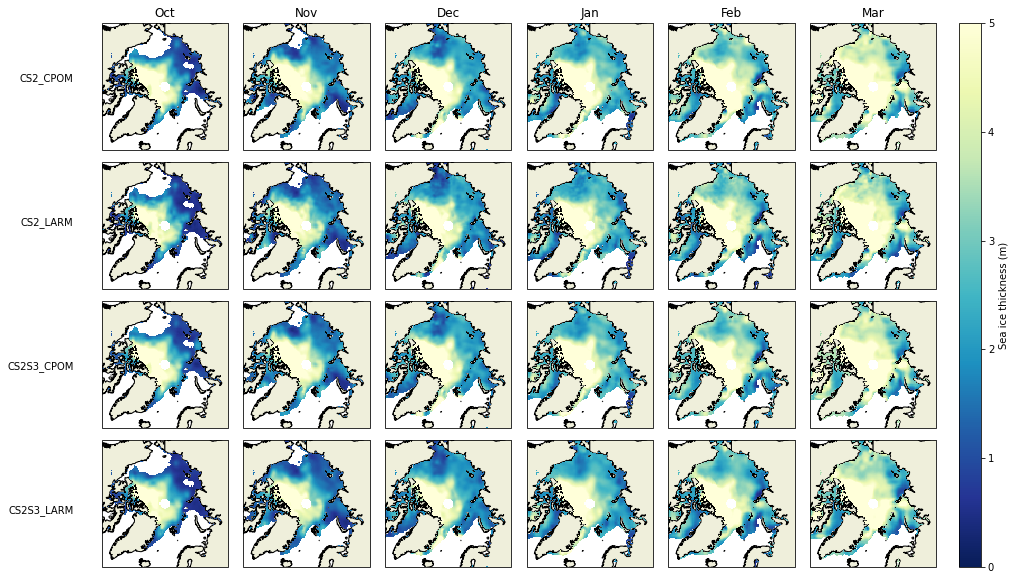

In [62]:
sats = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM']
months = ['Oct','Nov','Dec','Jan','Feb','Mar']

Ku = {}
Ka = {}
for sat in sats:
    for month in months:
        Ku[sat + '_' + month] = data[sat + '_' + month]
        Ka[sat + '_' + month] = data['IS2_' + month]

obs_Ku = []
for key in Ku:
    obs_Ku.append(key)
obs_Ka = []
for key in Ka:
    obs_Ka.append(key)
    
lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=6, nrows=4,hspace=0.1,wspace=0.1)

for counter in range(0,24):

    alpha_1=1.0
    alpha_2=0.0

    fb1 = Ku[obs_Ku[counter]]
    fb2 = Ka[obs_Ka[counter]]   

    rho_w=1000.
    rho_i=950.
    rho_s=330.
    c=3.
    c_s=2.

    A11=(rho_w-rho_i)/rho_w
    A12=(1-alpha_1*c/c_s-rho_s/rho_w)
    A21=(rho_w-rho_i)/rho_w
    A22=(1-alpha_2*c/c_s-rho_s/rho_w)

    h=np.zeros((160,160,2))
    A = np.array([[A11,A12],[A21,A22]]) 
    Ainv = np.linalg.inv(A)
    for i in range(160):
        for j in range(160):
            h[i,j] = np.dot(Ainv,np.array([fb1[i,j],fb2[i,j]]))

    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,h[:,:,0],cmap='YlGnBu_r',vmin=0,vmax=5,alpha=1.0, transform=ccrs.PlateCarree())
    
    if counter < 6:
        ax.set_title(months[counter])
        
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Sea ice thickness (m)")

fig.text(0.1, 0.8, 'CS2_CPOM', ha='right')
fig.text(0.1, 0.6, 'CS2_LARM', ha='right')
fig.text(0.1, 0.4, 'CS2S3_CPOM', ha='right')
fig.text(0.1, 0.2, 'CS2S3_LARM', ha='right')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Upgrade Report/figures/sit_IS2.png',bbox_inches = "tight")

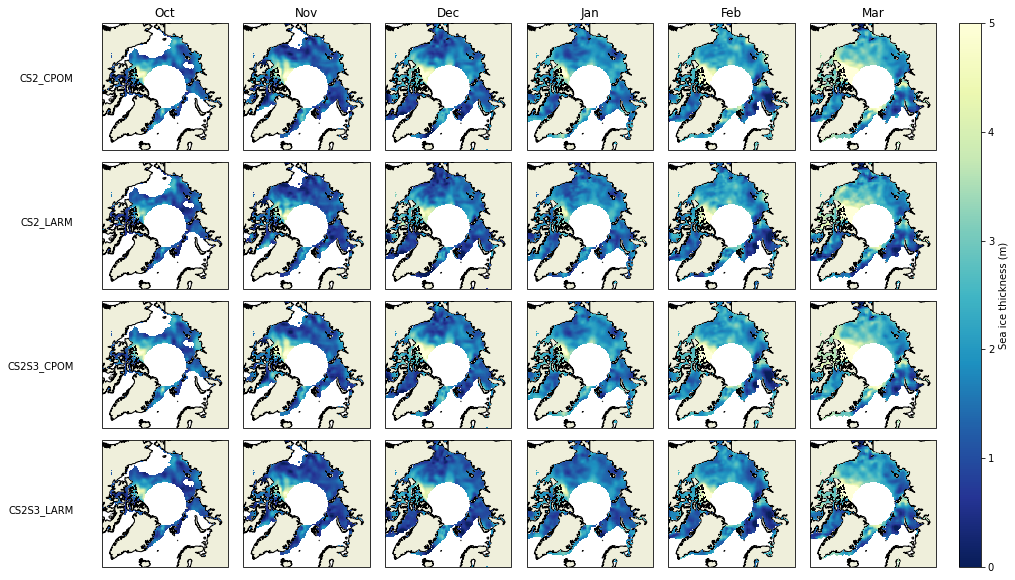

In [63]:
sats = ['CS2_CPOM','CS2_LARM','CS2S3_CPOM','CS2S3_LARM']
months = ['Oct','Nov','Dec','Jan','Feb','Mar']

Ku = {}
Ka = {}
for sat in sats:
    for month in months:
        Ku[sat + '_' + month] = data[sat + '_' + month]
        Ka[sat + '_' + month] = data['AK_CPOM_' + month]

obs_Ku = []
for key in Ku:
    obs_Ku.append(key)
obs_Ka = []
for key in Ka:
    obs_Ka.append(key)
    
lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=6, nrows=4,hspace=0.1,wspace=0.1)

for counter in range(0,24):

    alpha_1=1.0
    alpha_2=0.0

    fb1 = Ku[obs_Ku[counter]]
    fb2 = Ka[obs_Ka[counter]]   

    rho_w=1000.
    rho_i=950.
    rho_s=330.
    c=3.
    c_s=2.

    A11=(rho_w-rho_i)/rho_w
    A12=(1-alpha_1*c/c_s-rho_s/rho_w)
    A21=(rho_w-rho_i)/rho_w
    A22=(1-alpha_2*c/c_s-rho_s/rho_w)

    h=np.zeros((160,160,2))
    A = np.array([[A11,A12],[A21,A22]]) 
    Ainv = np.linalg.inv(A)
    for i in range(160):
        for j in range(160):
            h[i,j] = np.dot(Ainv,np.array([fb1[i,j],fb2[i,j]]))

    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,h[:,:,0],cmap='YlGnBu_r',vmin=0,vmax=5,alpha=1.0, transform=ccrs.PlateCarree())
    
    if counter < 6:
        ax.set_title(months[counter])
        
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Sea ice thickness (m)")

fig.text(0.1, 0.8, 'CS2_CPOM', ha='right')
fig.text(0.1, 0.6, 'CS2_LARM', ha='right')
fig.text(0.1, 0.4, 'CS2S3_CPOM', ha='right')
fig.text(0.1, 0.2, 'CS2S3_LARM', ha='right')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Upgrade Report/figures/sit_AK.png',bbox_inches = "tight")

In [64]:
# SIT vary alpha

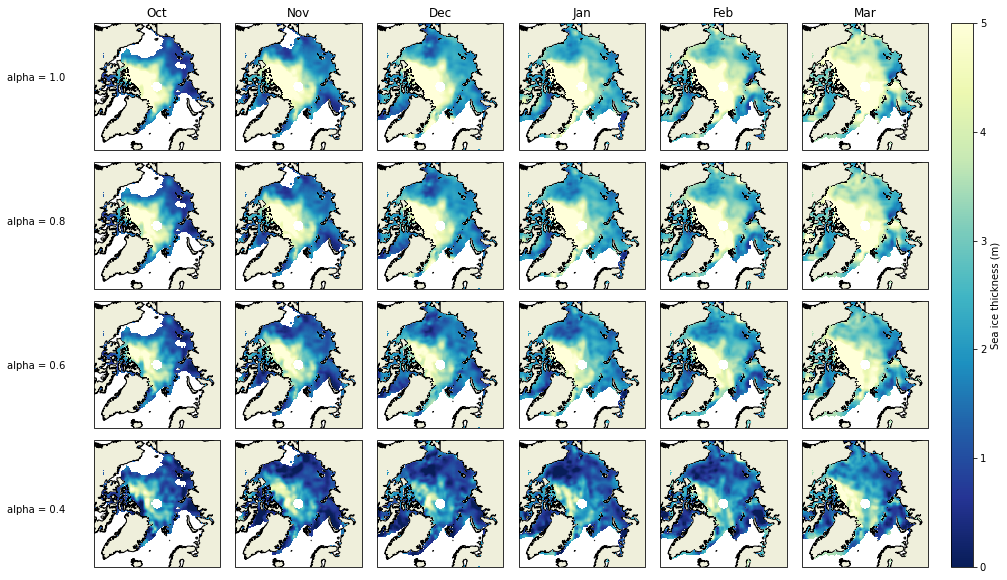

In [65]:
months = ['Oct','Nov','Dec','Jan','Feb','Mar'] * 4

Ku = {}
Ka = {}

for counter in range(0,24):
    Ku[counter] = data['CS2_CPOM_' + months[counter]]
    Ka[counter] = data['IS2_' + months[counter]]

lats = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lat.npy')
lons = np.load('/Users/carmennab/PhD/OI_PolarSnow/freeboard_daily_processed/Robbie_lon.npy')

fig = plt.figure(figsize=(15,10))
spec = gridspec.GridSpec(ncols=6, nrows=4,hspace=0.1,wspace=0.1)

for counter in range(0,24):
    
    if counter < 6:
        alpha_1 = 1.0
    if counter in [6,7,8,9,10,11]:
        alpha_1 = 0.8
    if counter in [12,13,14,15,16,17]:
        alpha_1 = 0.6
    if counter > 17:
        alpha_1 = 0.4
    alpha_2=0.0

    fb1 = Ku[counter]
    fb2 = Ka[counter]   

    rho_w=1000.
    rho_i=950.
    rho_s=330.
    c=3.
    c_s=2.

    A11=(rho_w-rho_i)/rho_w
    A12=(1-alpha_1*c/c_s-rho_s/rho_w)
    A21=(rho_w-rho_i)/rho_w
    A22=(1-alpha_2*c/c_s-rho_s/rho_w)

    h=np.zeros((160,160,2))
    A = np.array([[A11,A12],[A21,A22]]) 
    Ainv = np.linalg.inv(A)
    for i in range(160):
        for j in range(160):
            h[i,j] = np.dot(Ainv,np.array([fb1[i,j],fb2[i,j]]))

    ax = fig.add_subplot(spec[counter],projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    p_map = ax.pcolormesh(lons,lats,h[:,:,0],cmap='YlGnBu_r',vmin=0,vmax=5,alpha=1.0, transform=ccrs.PlateCarree())
    
    if counter < 6:
        ax.set_title(months[counter])
        
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
cb = fig.colorbar(x, cax=cbar_ax,label="Sea ice thickness (m)")

fig.text(0.1, 0.8, 'alpha = 1.0', ha='right')
fig.text(0.1, 0.6, 'alpha = 0.8', ha='right')
fig.text(0.1, 0.4, 'alpha = 0.6', ha='right')
fig.text(0.1, 0.2, 'alpha = 0.4', ha='right')

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Upgrade Report/figures/sit_IS2_alpha.png',bbox_inches = "tight")